In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20

In [2]:
def average(array, num):
    data = array[:num]
    n,m = data.shape
    av = np.zeros(m)
    for i in range(n):
        av += data[i]
    av /= n
    return av

### PPC 100 test (Fig. 1 SJ et al.)

In [3]:
I = np.load('Ensemble_I_test.npy')
I_srs= np.load('Ensemble_SRS_test.npy')/I

I = np.log(I)
I_srs = np.log(I_srs)

I = I.flatten()
I_srs = I_srs.flatten()

I = I.tolist()
I_srs = I_srs.tolist()

import json
with open('../training_results/1D_low_res/all_inputs.json', 'w') as f:
        json.dump(I, f, indent=1)
with open('../training_results/1D_low_res/all_reflectivity.json', 'w') as f:
        json.dump(I_srs, f, indent=1)


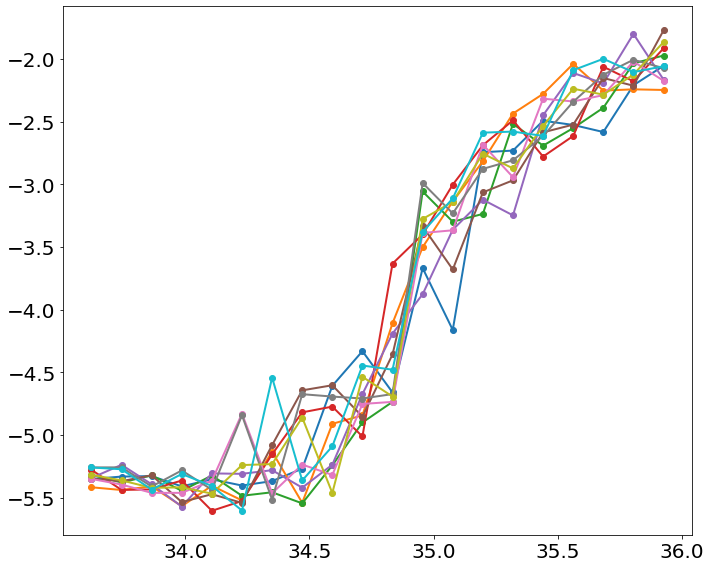

In [6]:
for i in range(10):

    plt.plot(I[i], I_srs[i], '-o')
    plt.gcf().set_size_inches(10,8)

In [8]:
I_srs_av = np.zeros((10,20))
I_av = np.zeros((10,20))

for i in range(len(I_av)):
    I_av[i] = average(I, num=int(i+1))
    I_srs_av[i] = average(I_srs, num=int(i+1))


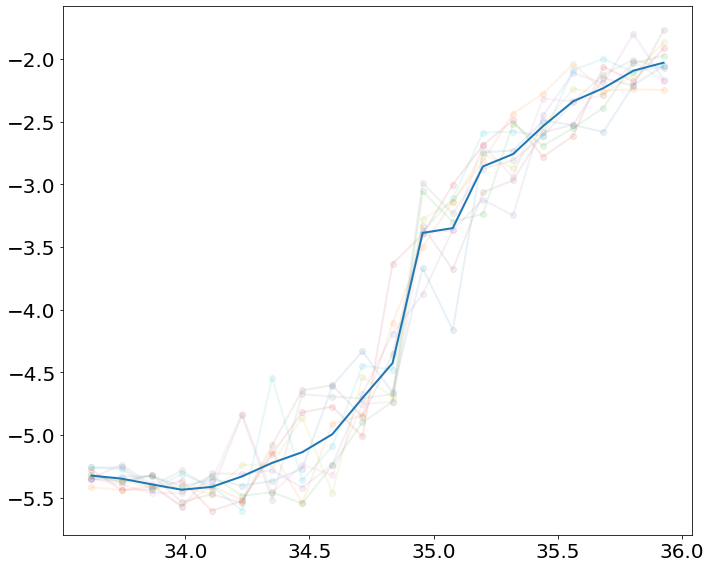

In [9]:
for i in range(10):

    plt.plot(I[i], I_srs[i], '-o', alpha  = 0.1)
    plt.gcf().set_size_inches(10,8)
plt.plot(I_av[-1], I_srs_av[-1])

In [10]:
I_srs_mean = I_srs_av[-1]

In [11]:
sum_ = 0
for i in range(len(I_srs)):
    sum_ += (I_srs[i] - I_srs_mean)**2

sum_ /= len(I_srs)

var = sum_

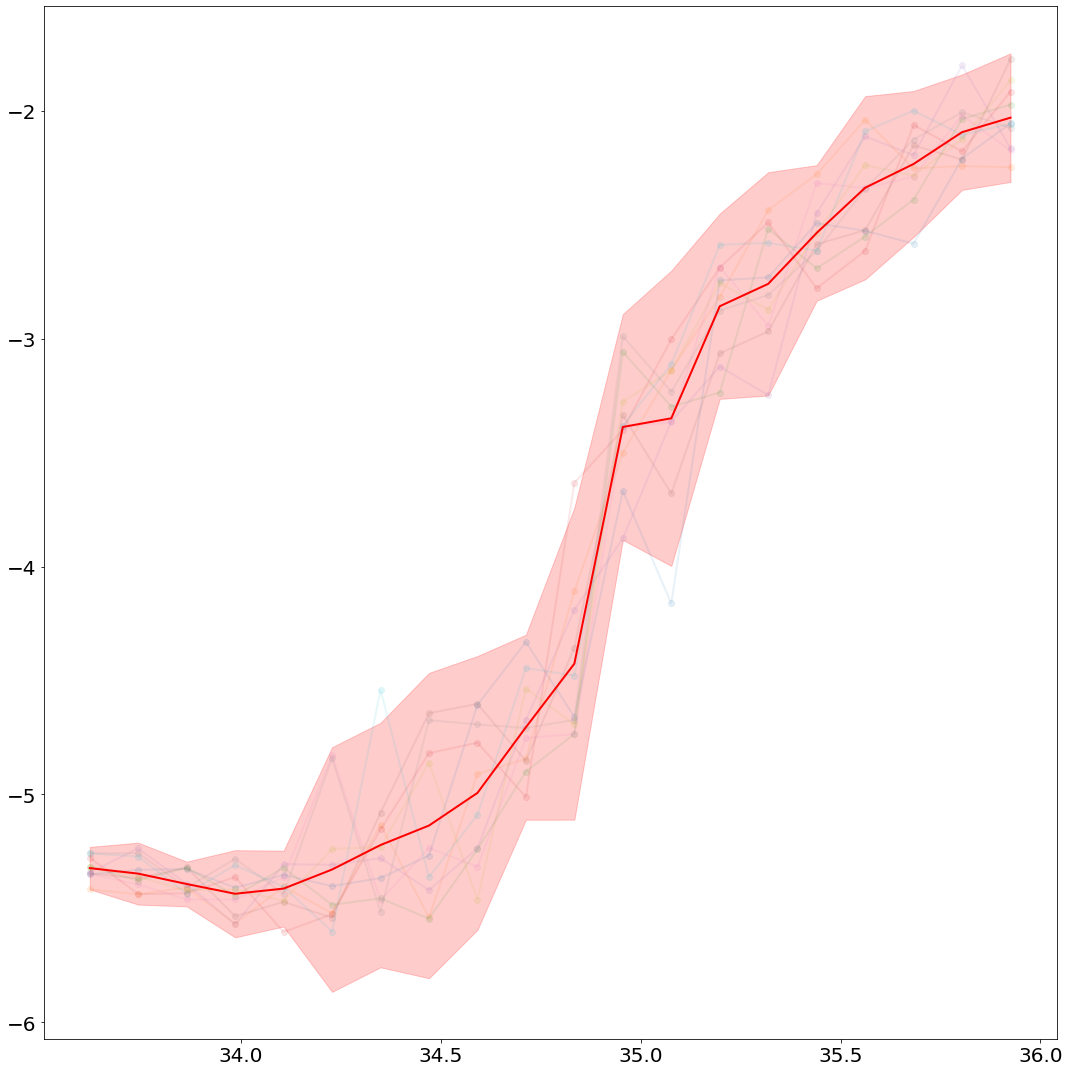

In [13]:
for i in range(10):
    plt.plot(I[i], I_srs[i], '-o', alpha  = 0.1)
plt.plot(I_av[-1], I_srs_mean, color = 'red')
plt.fill_between(I_av[-1], I_srs_mean-2.0*np.sqrt(var), I_srs_mean+2.0*np.sqrt(var), alpha = 0.2, color = 'red')

In [14]:
var = var.tolist()
mean = I_srs_mean.tolist()
input = I_av[-1].tolist()

In [15]:
# import json
# with open('../training_results/1D_low_res/train_inputs.json', 'w') as f:
#         json.dump(input, f, indent=1)
# with open('../training_results/1D_low_res/train_reflectivity_mean.json', 'w') as f:
#         json.dump(mean, f, indent=1)
# with open('../training_results/1D_low_res/train_reflectivity_var.json', 'w') as f:
#         json.dump(var, f, indent=1)